In [1]:
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt 

#### Logistic growth ODE
In this exercice, we will simulate a population growing according to the logistic growth function:
$$ {dN \over dt} = {r.(1-{N \over K}).N } $$
with N0 = 2 , a growth rate of 0.2 and a carrying capacity of 1000.

We will first simulate growth using the Euler method. First define the initial conditions: start value, parameters, dt (choose dt yourself) and how long we will simulate. Let's simulate until 100.

In [2]:
N0=2
r=0.2
K=1000
dt=0.1

time_end=100
steps=int(time_end/dt)

Now we build the integrator. Copy the Euler integrator code from ExponentialGrowth_Euler_ODEINT.ipynb and update it to allow logistic growth.

In [3]:
time_start=0
N_list=[(N0,time_start)]

for n in range(steps):

    N_current=N_list[-1][0]
    N_t_1=N_current+r*N_current*(1-N_current/K)*dt
    
    time=N_list[-1][1]+dt
    
    N_list.append((N_t_1,time))
    
    n=n+1
    if N_list[-1][1]>=time_end:
        break #breaks the for loop and ends the simulation

Now plot the output. Is the plot smooth. If not check the value you chose for dt. Lowering might help.

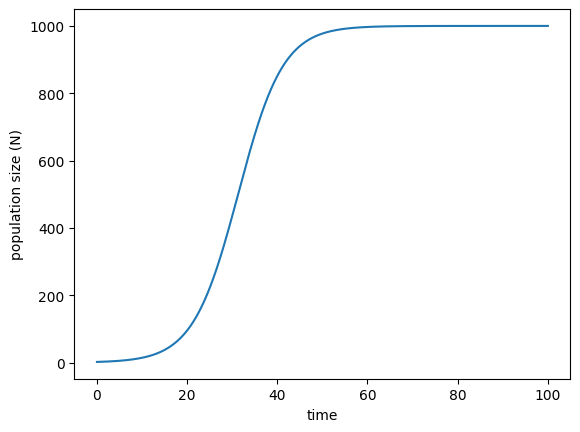

In [4]:
N,time=np.array(N_list).T
plt.plot(time,N)
plt.xlabel('time')
plt.ylabel('population size (N)')
plt.show()


Let's now try the ODEINT method of simulation.

In the next cell, define the initial conditions. Also define a timestep list of 100 timesteps from 0 to 100 using [np.linspace()](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)


In [7]:
N0 = 2
k_growth=0.2
K=1000

parameters=(k_growth,K)
t = np.linspace(0,100, num=100)

Next, we build the ODE model using [def](https://www.geeksforgeeks.org/python-def-keyword/#:~:text=Python%20def%20keyword%20is%20used,using%20the%20%E2%80%9Cdef%E2%80%9D%20keyword.) keyword.

In [8]:
def model(N,t,k_growth,K):
    dNdt = k_growth * (1-N/K) * N
    return dNdt

Now run the simulation use the odeint() function and plot its output against time.

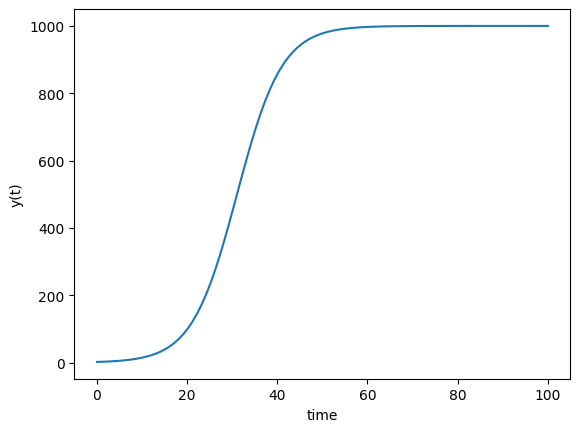

In [12]:
y = odeint(model,N0,t,args=parameters)

plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

Optional: Let's programatically try to find when growth is the fastest. You can do this by iterating, using a for loop, over the output of odeint and solving the differential equation manually or by calling the model function. 

In [14]:
dydt_time=[]
y0 = 2
k_growth=0.2
K=1000
for pops in y:
    N=pops
    dNdt = k_growth * (1-N/K) * N
    dydt_time.append(dNdt)


In [16]:
dydt_time.index(max(dydt_time))

31

In [15]:
max(dydt_time)

array([49.96873794])

Text(0, 0.5, 'N')

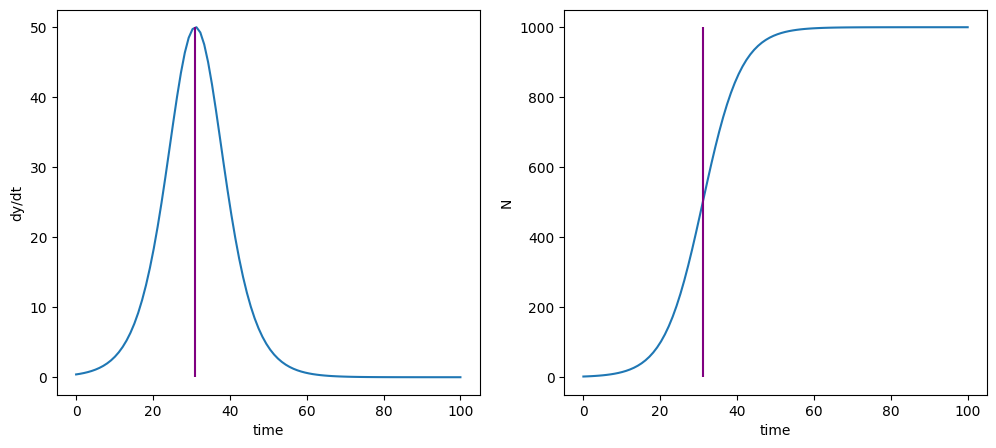

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 5), sharey=False)


ax1.plot(t,dydt_time)
ax1.vlines(x = 31, ymin = 0, ymax = max(dydt_time),
           colors = 'purple',
           label = 'max growth rate')
ax1.set_xlabel('time')
ax1.set_ylabel('dy/dt')
ax2.plot(t,y)
ax2.vlines(x = 31, ymin = 0, ymax = max(y),
           colors = 'purple',
           label = 'max growth rate')



ax2.set_xlabel('time')
ax2.set_ylabel('N')
